In [1]:
import pandas as pd
import numpy as np
import anndata

from dredFISH.Utils.__init__plots import *
# import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# metadata
f = './data/Johann_2016/sample_metadata.csv'
meta = pd.read_csv(f, skiprows=2).set_index("Sample Name")

f = './data/Johann_2016/sample_name_map.csv'
nmap = pd.read_csv(f, header=None)
nmap.columns = ['gsm', 'sample']
meta = meta.join(nmap.set_index('sample'))
meta = meta[~meta['gsm'].isnull()]
meta

,Molecular Subgroup (Consensus),Subgrouping based on 450K methylation data,Subrouping based on Affymetrix gene expression data,Subgrouping based on WGBS methylation data,Subgrouping based on H3K27Ac enhancer correlation,WGS cohort,RNASequencing cohort,WGBS cohort,H3K27Ac ChIP Sequencing cohort,BRD4 ChIP Sequencing cohort,OTX2 ChIP Sequencing cohort,MITF ChIP Sequencing cohort,"Gender (F= FeMale, M=Male)",Age at diagnosis,Localization of primary tumor,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Previosuly published (PMID number),gsm
Sample Name,,,,,,,,,,,,,,,,,,,
dkfz_ATRT_1,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,2.00,infratentorial,NaN,NaN,NaN,GSM1755170
dkfz_ATRT_2,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,2.00,infratentorial,NaN,NaN,NaN,GSM1755171
dkfz_ATRT_3,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,infratentorial,delExon5,delExon5,NaN,GSM1755172
dkfz_ATRT_4,MYC,MYC,NaN,MYC,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,M,4.00,infratentorial,delExon1_Exon9,delTBX1_NIPSNAP1,NaN,GSM1755173
dkfz_ATRT_5,SHH,SHH,NaN,SHH,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,M,4.00,supratentorial,c.197C>A p.Ser66*,delTBX1_NIPSNAP1,NaN,GSM1755174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dkfz_ATRT_146,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,supratentorial,NaN,NaN,NaN,GSM2051701
dkfz_ATRT_147,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,supratentorial,NaN,NaN,NaN,GSM2051702
dkfz_ATRT_148,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0.90,infratentorial,SMARCA4,NaN,NaN,GSM2051673


In [3]:
# mc data
f = "./data/Johann_2016/Johann_2016_betas.h5ad"
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 485512 × 150

In [4]:
name_lookup = meta.reset_index().set_index('gsm')['Sample Name']
adata.var.index = [name_lookup.loc[samp.split('_')[0]] for samp in adata.var.index]
adata.var = meta.loc[adata.var.index]
adata.var

,Molecular Subgroup (Consensus),Subgrouping based on 450K methylation data,Subrouping based on Affymetrix gene expression data,Subgrouping based on WGBS methylation data,Subgrouping based on H3K27Ac enhancer correlation,WGS cohort,RNASequencing cohort,WGBS cohort,H3K27Ac ChIP Sequencing cohort,BRD4 ChIP Sequencing cohort,OTX2 ChIP Sequencing cohort,MITF ChIP Sequencing cohort,"Gender (F= FeMale, M=Male)",Age at diagnosis,Localization of primary tumor,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Previosuly published (PMID number),gsm
dkfz_ATRT_1,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,2.0,infratentorial,NaN,NaN,NaN,GSM1755170
dkfz_ATRT_2,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,2.0,infratentorial,NaN,NaN,NaN,GSM1755171
dkfz_ATRT_3,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,infratentorial,delExon5,delExon5,NaN,GSM1755172
dkfz_ATRT_4,MYC,MYC,NaN,MYC,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,M,4.0,infratentorial,delExon1_Exon9,delTBX1_NIPSNAP1,NaN,GSM1755173
dkfz_ATRT_5,SHH,SHH,NaN,SHH,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,M,4.0,supratentorial,c.197C>A p.Ser66*,delTBX1_NIPSNAP1,NaN,GSM1755174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dkfz_ATRT_143,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,infratentorial,NaN,NaN,NaN,GSM2051698
dkfz_ATRT_144,MYC,MYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,GSM2051699
dkfz_ATRT_145,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,GSM2051700
dkfz_ATRT_146,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,supratentorial,NaN,NaN,NaN,GSM2051701


In [5]:
colors = sns.color_palette('Set1', 3)
colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)]

In [6]:
palette = {
    'TYR': colors[0],
    'SHH': colors[1],
    'MYC': colors[2],
}

In [7]:
clsts = adata.var['Subgrouping based on 450K methylation data'].values
clsts

array(['SHH', 'SHH', 'SHH', 'MYC', 'SHH', 'TYR', 'SHH', 'TYR', 'SHH',
       'TYR', 'SHH', 'SHH', 'MYC', 'TYR', 'SHH', 'TYR', 'SHH', 'SHH',
       'SHH', 'SHH', 'SHH', 'TYR', 'TYR', 'TYR', 'TYR', 'MYC', 'MYC',
       'TYR', 'SHH', 'TYR', 'SHH', 'SHH', 'TYR', 'TYR', 'SHH', 'SHH',
       'MYC', 'SHH', 'SHH', 'TYR', 'MYC', 'SHH', 'MYC', 'SHH', 'SHH',
       'MYC', 'TYR', 'TYR', 'MYC', 'MYC', 'SHH', 'TYR', 'MYC', 'SHH',
       'SHH', 'SHH', 'TYR', 'TYR', 'MYC', 'SHH', 'TYR', 'TYR', 'MYC',
       'MYC', 'MYC', 'TYR', 'TYR', 'SHH', 'MYC', 'TYR', 'MYC', 'SHH',
       'TYR', 'SHH', 'SHH', 'TYR', 'MYC', 'TYR', 'SHH', 'TYR', 'SHH',
       'MYC', 'TYR', 'TYR', 'TYR', 'SHH', 'TYR', 'MYC', 'MYC', 'MYC',
       'MYC', 'TYR', 'TYR', 'TYR', 'TYR', 'MYC', 'SHH', 'TYR', 'TYR',
       'TYR', 'TYR', 'SHH', 'SHH', 'MYC', 'SHH', 'SHH', 'SHH', 'SHH',
       'SHH', 'TYR', 'SHH', 'TYR', 'SHH', 'SHH', 'MYC', 'SHH', 'SHH',
       'SHH', 'MYC', 'SHH', 'SHH', 'SHH', 'SHH', 'SHH', 'MYC', 'MYC',
       'TYR', 'SHH',

In [8]:
adata.obs

""
cg00050873
cg00212031
cg00213748
cg00214611
cg00455876
...
ch.22.909671F
ch.22.46830341F
ch.22.1008279F
ch.22.47579720R


In [9]:
adata.X.shape

(485512, 150)

In [10]:
ftrs = adata.X
print(ftrs.shape)
ftrs = ftrs[~np.any(np.isnan(ftrs), axis=1)]
print(ftrs.shape)

sites_std = ftrs.std(axis=1)
th = np.sort(sites_std)[::-1][7500]
print(th)
hvftrs = ftrs[sites_std > th]
print(hvftrs.shape)

(485512, 150)
(484716, 150)
0.2376051
(7500, 150)


Text(0.5, 1.0, 'Top 7500 sites with std > 0.238')

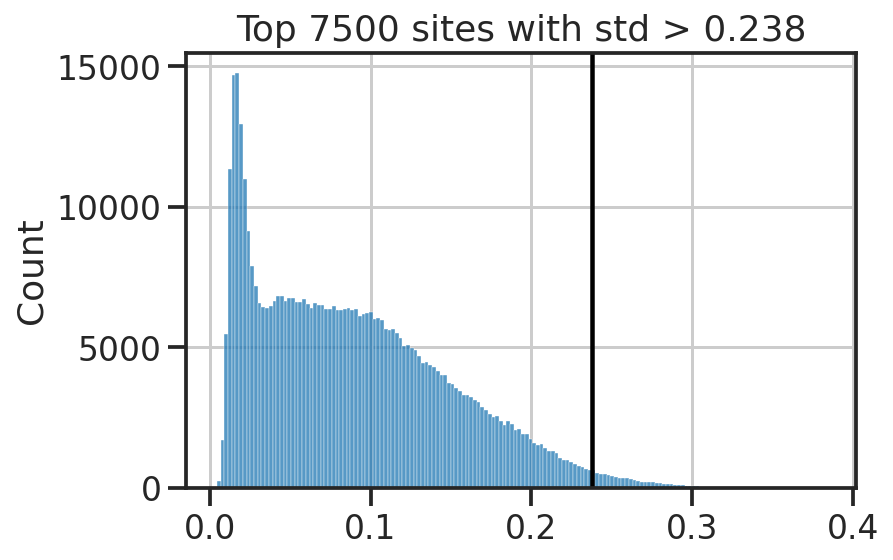

In [11]:
sns.histplot(sites_std)
plt.axvline(th, color='k')
plt.title(f"Top {len(hvftrs)} sites with std > {th:.3g}")

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


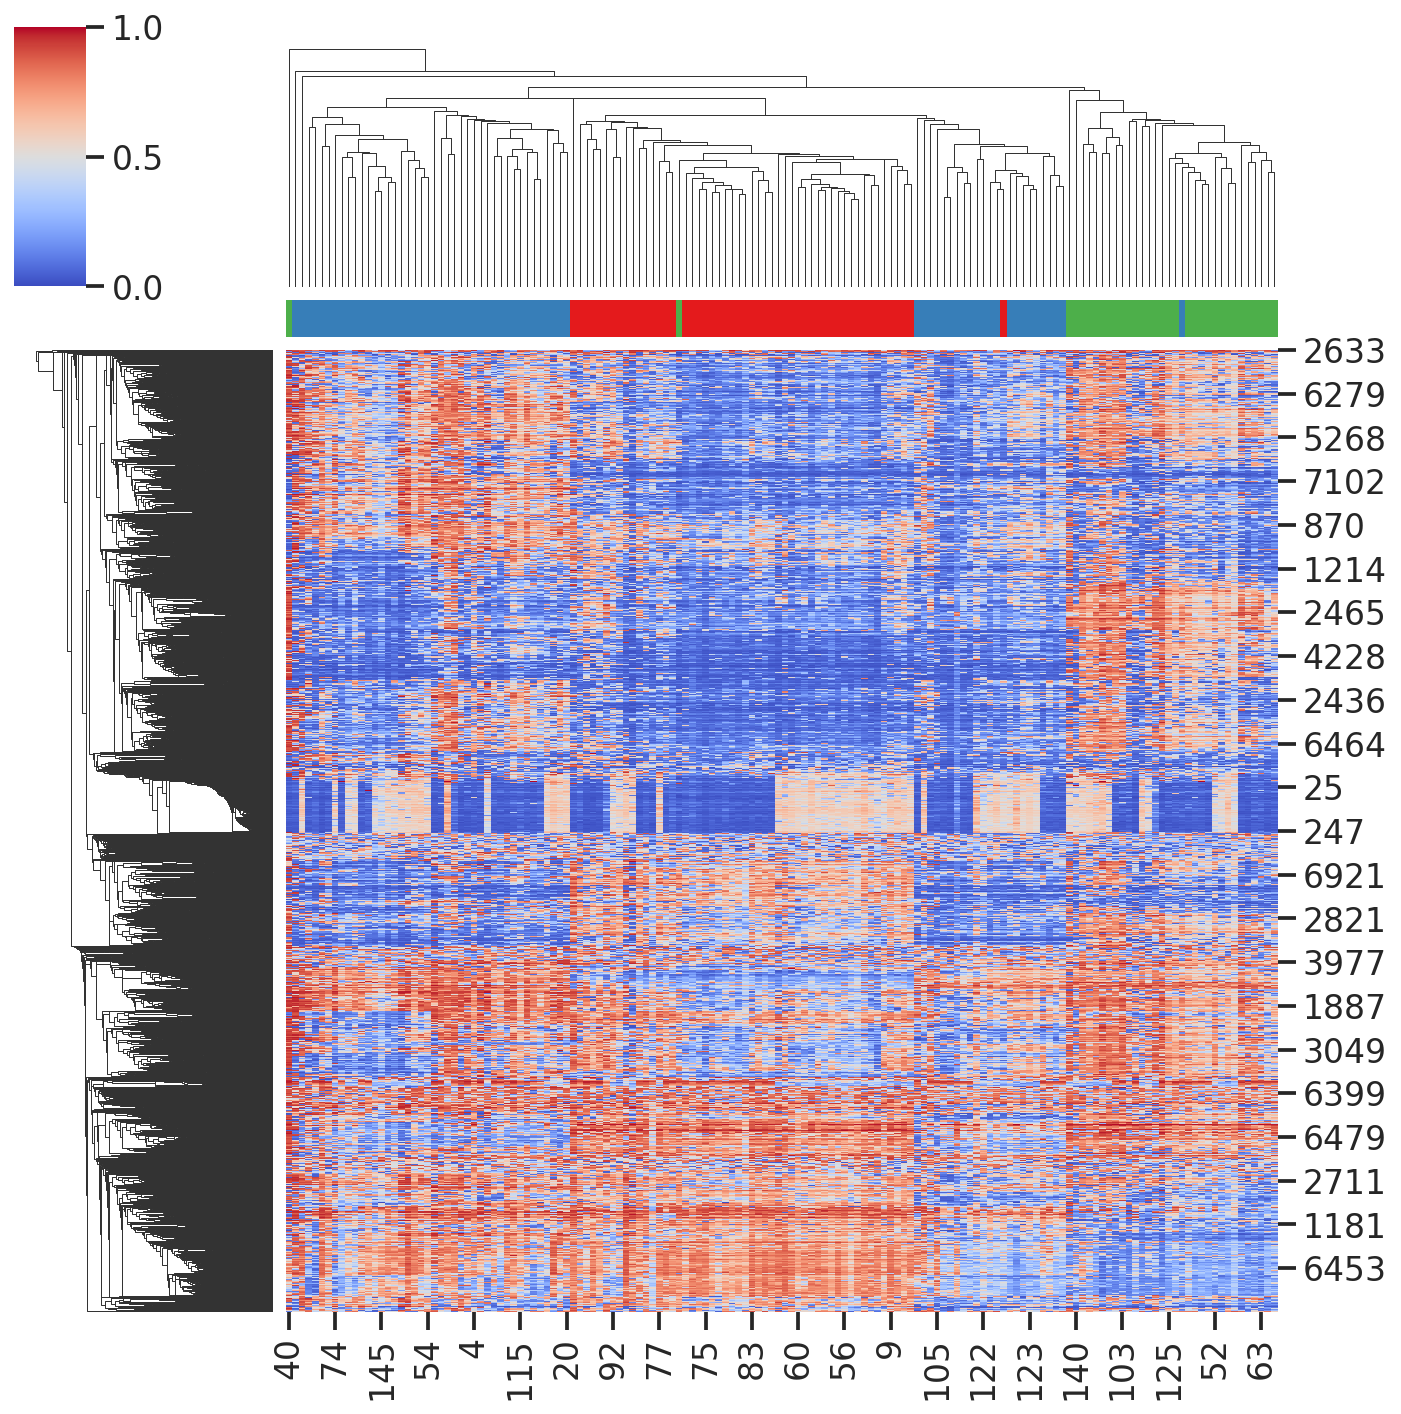

In [12]:
g = sns.clustermap(hvftrs, cmap='coolwarm', col_colors=pd.Series(clsts).map(palette).values)

In [13]:
# annotate cg sites
# overlap mammal 320

In [14]:
sites_comm = np.load('./data/m320k_i450k_overlap_5559.npy', allow_pickle=True)
print(sites_comm.shape)
sites_comm = np.intersect1d(sites_comm, adata.obs.index.values)
print(sites_comm.shape)
sites_comm

(5559,)
(5500,)


array(['cg00000165', 'cg00001364', 'cg00001582', ..., 'ch.13.39564907R',
       'ch.2.30415474F', 'ch.3.741789F'], dtype=object)

In [15]:
adata.obs.loc[sites_comm]

""
cg00000165
cg00001364
cg00001582
cg00003994
cg00005112
...
cg27664614
ch.12.1107853R
ch.13.39564907R
ch.2.30415474F


In [16]:
adatasub = adata[sites_comm]
adatasub

View of AnnData object with n_obs × n_vars = 5500 × 150
    var: 'Molecular Subgroup (Consensus)', 'Subgrouping based on 450K methylation data', 'Subrouping based on Affymetrix gene expression data', 'Subgrouping based on WGBS methylation data', 'Subgrouping based on H3K27Ac enhancer correlation', 'WGS cohort', 'RNASequencing cohort', 'WGBS cohort', 'H3K27Ac ChIP Sequencing cohort', 'BRD4 ChIP Sequencing cohort', 'OTX2 ChIP Sequencing cohort', 'MITF ChIP Sequencing cohort', 'Gender (F= FeMale, M=Male)', 'Age at diagnosis', 'Localization of primary tumor', 'Type of SMARCB1 mutation in MLPA/Sanger Sequencing ', 'Type of SMARCB1 mutation in MLPA/Sanger Sequencing', 'Previosuly published (PMID number)', 'gsm'

In [17]:
ftrs = adatasub.X
print(ftrs.shape)
ftrs = ftrs[~np.any(np.isnan(ftrs), axis=1)]
print(ftrs.shape)

sites_std = ftrs.std(axis=1)
# th = np.sort(sites_std)[::-1][7500]
# print(th)
th = 0.2
hvftrs = ftrs[sites_std > th]
print(hvftrs.shape)

(5500, 150)
(5489, 150)
(466, 150)


Text(0.5, 1.0, 'Top 466 sites with std > 0.2')

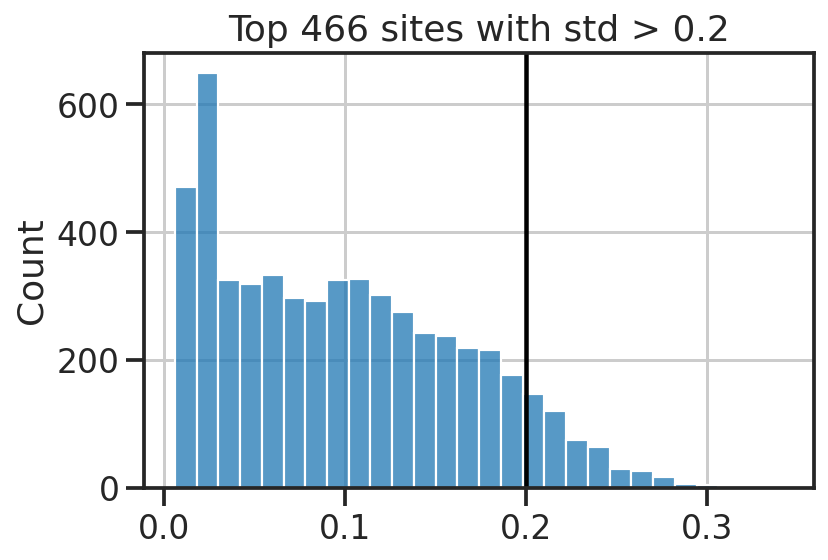

In [18]:
sns.histplot(sites_std)
plt.axvline(th, color='k')
plt.title(f"Top {len(hvftrs)} sites with std > {th}")

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


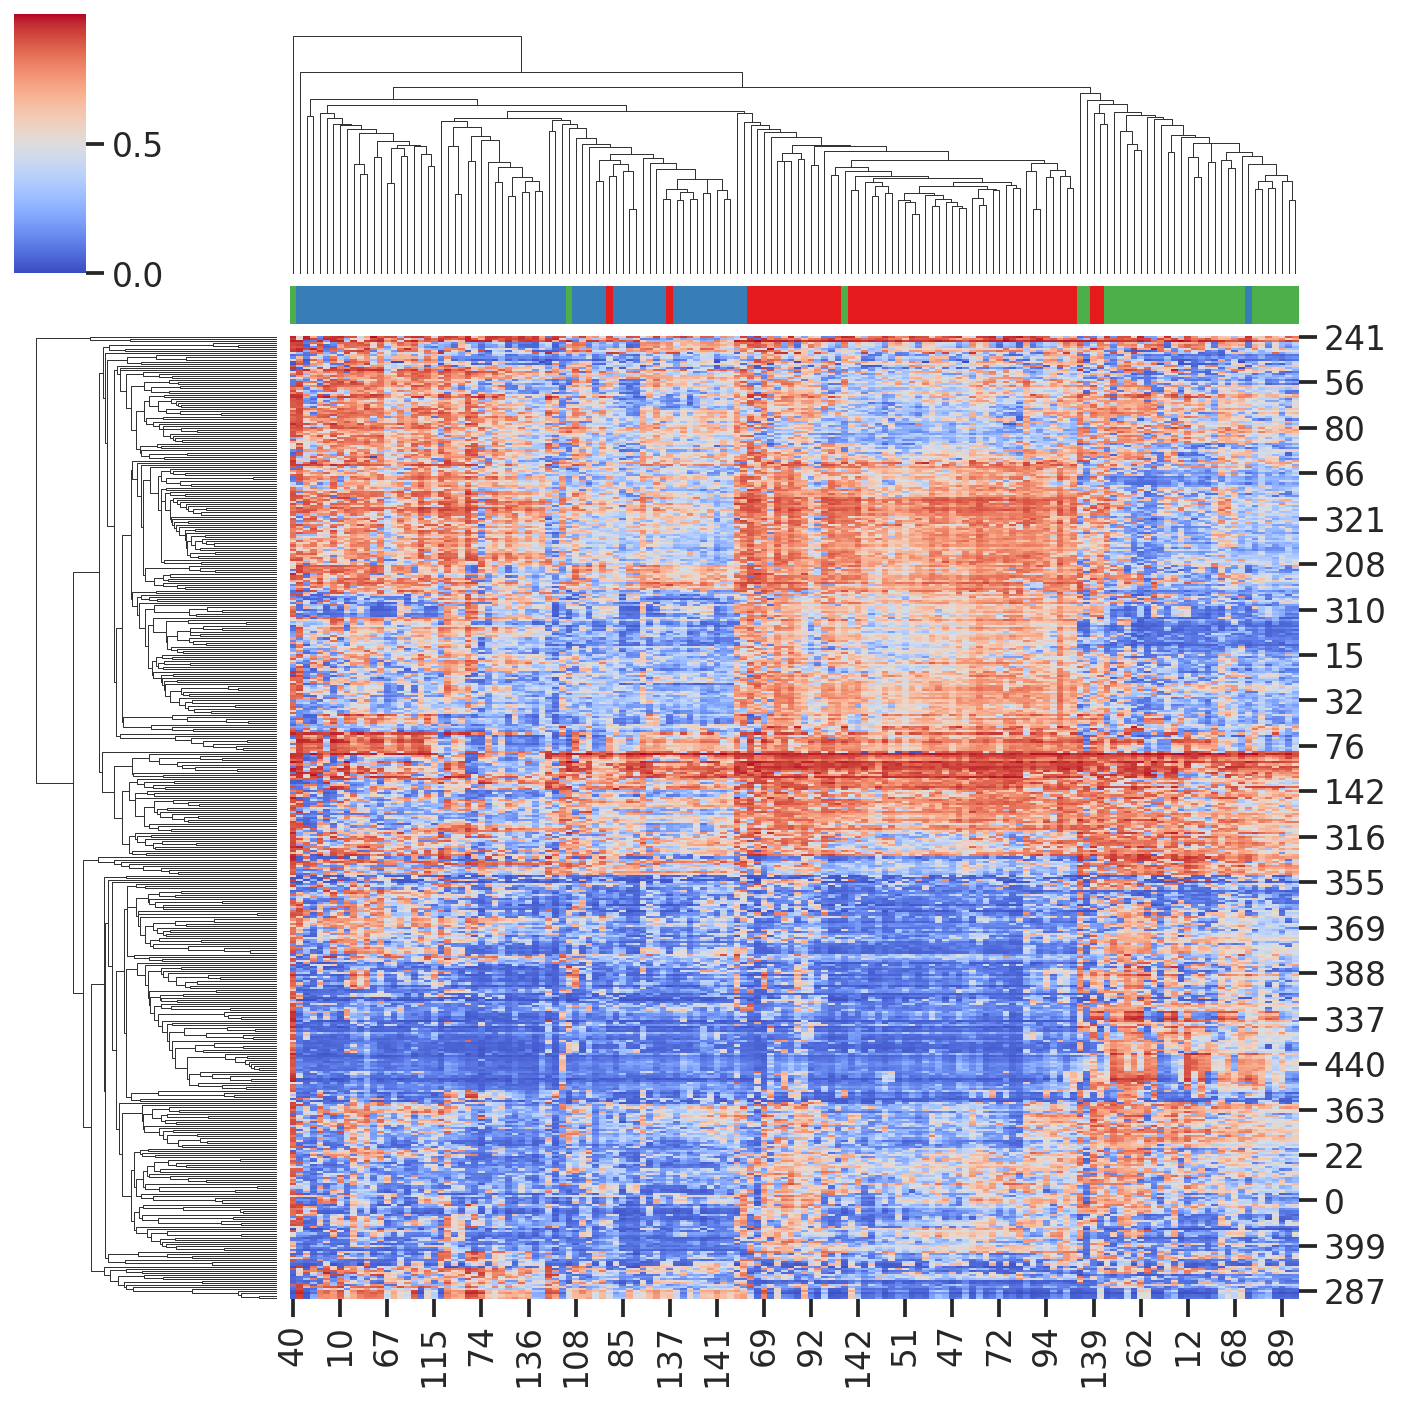

In [19]:
g = sns.clustermap(hvftrs, cmap='coolwarm', col_colors=pd.Series(clsts).map(palette).values)

In [ ]:
# annotate sites